<a href="https://colab.research.google.com/github/Supansapkb/bsc_dpdm22/blob/main/%5Bdataprep3%5DDiscretization_Normalization_One_hot_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nomalization-Standardization
https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:

import pandas as pd  

In [ ]:
/#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

import os
os.chdir('/content/gdrive/MyDrive/BPDM')

# ใช้ data กรมอุตุ

In [ ]:
weather_data = pd.read_csv('/content/gdrive/MyDrive/BPDM/dATA final กรมอุตุ.csv')

In [ ]:
weather_data.head()

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,ขอนแก่น,1,10,2011,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,ขอนแก่น,2,10,2011,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,ขอนแก่น,3,10,2011,1007.49,86,3,10,3,22.9,25.6,22.1
3,ขอนแก่น,4,10,2011,1008.28,80,2,8,0,21.9,25.8,22.8
4,ขอนแก่น,5,10,2011,1009.88,86,2,10,2.2,21.7,24.3,23.1


In [ ]:
weather_data.shape

(8169, 12)

In [ ]:
data_features = weather_data.iloc[:,4:]
data_features.head()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
0,1005.47,83,3,9,1.4,24.2,27.6,24.8
1,1006.65,92,2,10,17.7,24.0,25.6,23.0
2,1007.49,86,3,10,3,22.9,25.6,22.1
3,1008.28,80,2,8,0,21.9,25.8,22.8
4,1009.88,86,2,10,2.2,21.7,24.3,23.1


In [ ]:
data_features.dtypes

ความกด                float64
ความชื้นสัมพัทธ์        int64
ความเร็วลม             object
จำนวนเมฆ               object
ปริมาณฝน               object
อุณหภูมิจุดน้ำค้าง    float64
อุณหภูมิตุ้ม          float64
อุณหภูมิต่ำสุด         object
dtype: object

In [ ]:
data_features.describe()

,ความกด,ความชื้นสัมพัทธ์,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม
count,8169.000000,8169.000000,8169.000000,8169.000000
mean,1013.016946,69.798262,18.151916,24.868405
std,3.224640,8.870501,3.775475,2.846185
min,1002.040000,38.000000,1.500000,11.800000
25%,1010.960000,64.000000,15.800000,23.300000
50%,1012.800000,69.000000,18.400000,25.300000
75%,1015.010000,75.000000,21.000000,27.000000
max,1026.100000,99.000000,28.400000,31.000000


In [ ]:
weather_data[weather_data.eq('-').any(1)]

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
305,ขอนแก่น,3,10,2013,1009.88,78,4,4,-,23.5,27.9,24.3
306,ขอนแก่น,4,10,2013,1009.47,73,2,2,-,21.9,27.5,23.7
307,ขอนแก่น,5,10,2013,1008.08,69,3,3,-,20.7,27.3,22.5
308,ขอนแก่น,6,10,2013,1008.35,72,5,5,-,21.3,27.1,22.8
309,ขอนแก่น,7,10,2013,1009.30,72,2,2,-,21.3,27.0,23.5
...,...,...,...,...,...,...,...,...,...,...,...,...
8134,เลย,25,1,2021,1011.66,72,1,-,0,15.6,23.9,15.0
8135,เลย,26,1,2021,1011.62,73,2,-,0,15.7,23.2,15.0
8140,เลย,31,1,2021,1015.28,74,2,1,-,15.2,22.6,-
8161,เลย,21,2,2021,1013.57,68,1,-,0,15.2,23.2,14.0


In [ ]:
data_features[data_features['ความเร็วลม'].eq('-')]

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
1079,1012.65,87,-,-,53.3,23.5,25.8,24.5
1122,1011.47,61,-,-,-,19.7,28.5,22.7
1773,1008.50,73,-,4,0,20.2,25.6,20
1776,1009.51,89,-,7,1.2,22.0,24.2,21.1
1856,1009.45,73,-,4,0,23.9,29.7,24.9
1862,1011.50,70,-,6,0,21.0,27.5,22.2
1927,1015.58,65,-,2,0,15.0,22.7,15.3
1995,1014.22,67,-,1,-,19.4,26.5,20.6
2063,1013.33,68,-,-,-,14.0,21.0,-
2125,1011.17,72,-,8,0,21.3,27.1,23.0


In [ ]:
weather_data[weather_data['ความเร็วลม'].eq('-')]

,จังหวัด,วันที่,เดือนที่,ปีที่,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
1079,ขอนแก่น,21,10,2018,1012.65,87,-,-,53.3,23.5,25.8,24.5
1122,ขอนแก่น,3,12,2018,1011.47,61,-,-,-,19.7,28.5,22.7
1773,นครพนม,18,1,2012,1008.50,73,-,4,0,20.2,25.6,20
1776,นครพนม,21,1,2012,1009.51,89,-,7,1.2,22.0,24.2,21.1
1856,นครพนม,10,11,2012,1009.45,73,-,4,0,23.9,29.7,24.9
1862,นครพนม,16,11,2012,1011.50,70,-,6,0,21.0,27.5,22.2
1927,นครพนม,20,1,2013,1015.58,65,-,2,0,15.0,22.7,15.3
1995,นครพนม,29,10,2013,1014.22,67,-,1,-,19.4,26.5,20.6
2063,นครพนม,5,1,2014,1013.33,68,-,-,-,14.0,21.0,-
2125,นครพนม,8,10,2014,1011.17,72,-,8,0,21.3,27.1,23.0


In [ ]:
#data_features[data_features.eq('-').any(1)==False]

In [ ]:
data_features = data_features[data_features.eq('-').any(1)==False]
data_features.shape

(5061, 8)

In [ ]:
data_features = data_features[data_features.eq('T').any(1)==False]
data_features.shape

(5061, 8)

In [ ]:
data_features['ความเร็วลม'] = data_features['ความเร็วลม'].astype(float)
data_features['จำนวนเมฆ'] = data_features['จำนวนเมฆ'].astype(float)
data_features['ปริมาณฝน'] = data_features['ปริมาณฝน'].astype(float)
data_features['อุณหภูมิต่ำสุด'] = data_features['อุณหภูมิต่ำสุด'].astype(float)

In [ ]:
data_features.describe()

,ความกด,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิตุ้ม,อุณหภูมิต่ำสุด
count,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000,5061.000000
mean,1012.731324,70.438253,2.284726,3.308832,1.556194,18.420944,25.002667,19.933570
std,3.158633,9.433792,1.209540,2.494353,6.816712,3.630472,2.720534,3.295887
min,1002.040000,38.000000,0.000000,0.000000,0.000000,1.500000,11.800000,6.800000
25%,1010.760000,64.000000,1.000000,1.000000,0.000000,16.100000,23.500000,17.900000
50%,1012.610000,69.000000,2.000000,3.000000,0.000000,18.500000,25.400000,20.300000
75%,1014.710000,77.000000,3.000000,5.000000,0.000000,21.200000,26.900000,22.500000
max,1026.100000,99.000000,10.000000,10.000000,112.400000,28.400000,31.000000,26.700000


In [ ]:
import matplotlib  
matplotlib.rcParams['figure.figsize']=[12,12] #กำหนดขนาดของ figure

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3634 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3617 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3604 missing from current font.
  font.set_text(s

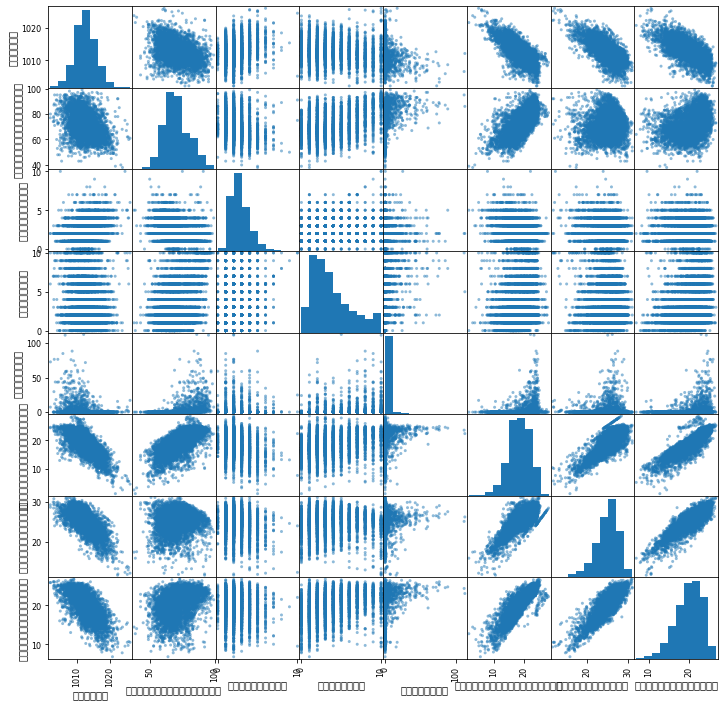

In [ ]:
pd.plotting.scatter_matrix(data_features);

In [ ]:
from matplotlib import pyplot as plt

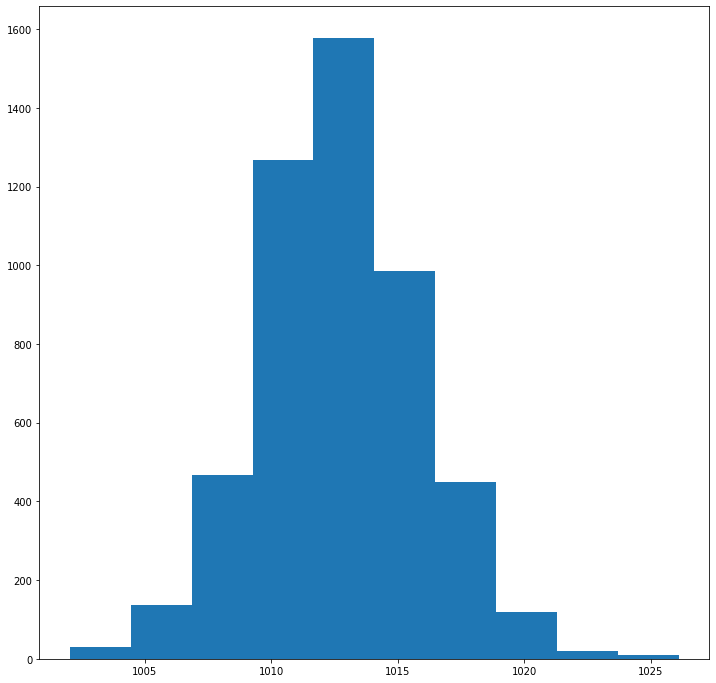

In [ ]:
plt.hist(data_features['ความกด']);

In [ ]:
from sklearn import preprocessing

In [ ]:
#define
scaler = preprocessing.StandardScaler()
#train
scaler.fit(data_features)
#PREDICT-TRANSFORM
data_features_s = scaler.transform(data_features)

In [ ]:
data_features_s 

array([[-2.29910857,  1.33170074,  0.5914187 , ...,  1.59197655,
         0.95480871,  1.47666181],
       [-1.92549238,  2.28581221, -0.23542385, ...,  1.53688186,
         0.21958617,  0.93047261],
       [-1.65952832,  1.64973789,  0.5914187 , ...,  1.23386103,
         0.21958617,  0.65737801],
       ...,
       [-2.49224914, -1.63664607, -0.23542385, ..., -1.49332646,
         0.47691406, -1.19359649],
       [-2.20728764, -1.53063368, -1.06226641, ..., -1.27294767,
         0.07254167, -1.4060034 ],
       [-1.43155912, -1.31860891, -1.06226641, ..., -0.88728479,
         0.21958617, -1.19359649]])

(array([  29.,  136.,  466., 1269., 1579.,  986.,  450.,  118.,   19.,
           9.]),
 array([-3.3851285 , -2.62333143, -1.86153436, -1.09973729, -0.33794022,
         0.42385684,  1.18565391,  1.94745098,  2.70924805,  3.47104512,
         4.23284218]),
 <a list of 10 Patch objects>)

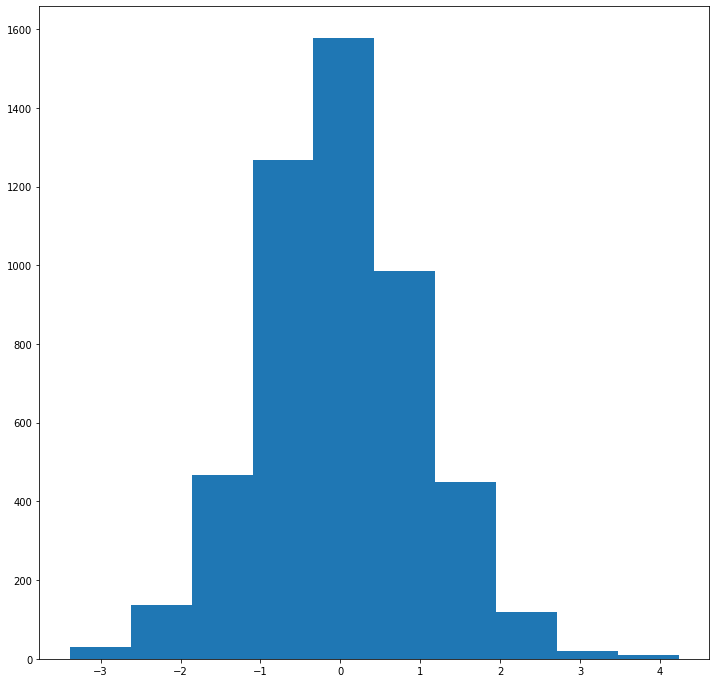

In [ ]:
plt.hist(data_features_s[:,0])

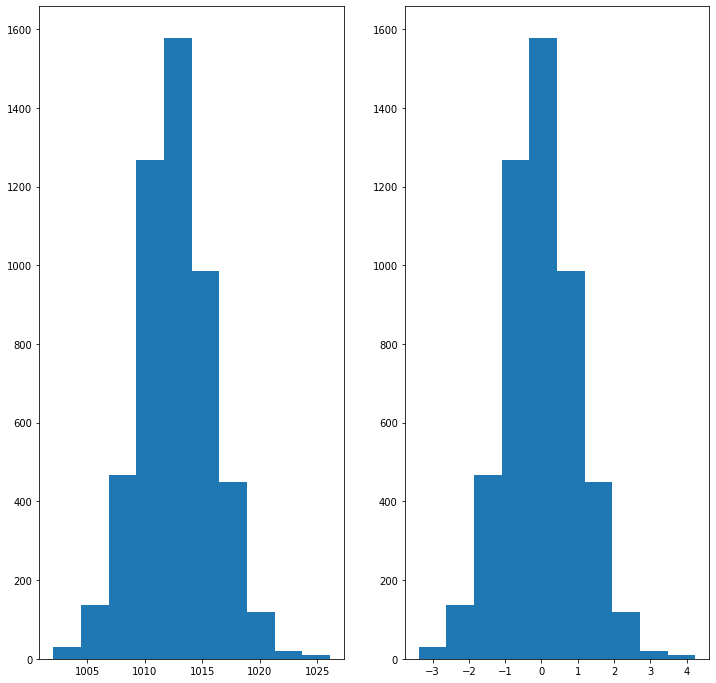

In [ ]:
plt.subplot(1,2,1)
plt.hist(data_features['ความกด']);
plt.subplot(1,2,2)
plt.hist(data_features_s[:,0]);


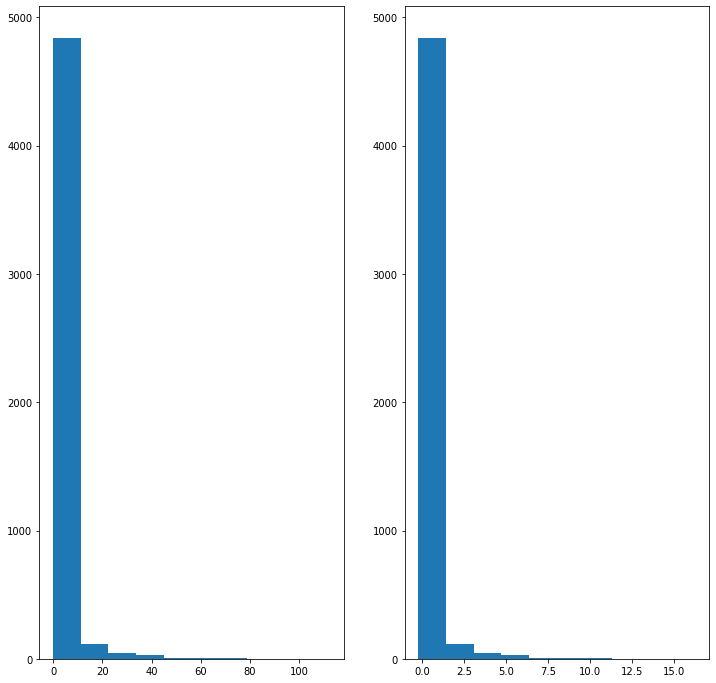

In [ ]:
plt.subplot(1,2,1)
plt.hist(data_features['ปริมาณฝน']);
plt.subplot(1,2,2)
plt.hist(data_features_s[:,4]);


# Min-Max

In [ ]:
#define
scaler = preprocessing.MinMaxScaler()
#train
scaler.fit(data_features)
#PREDICT-TRANSFORM
data_features_norm = scaler.transform(data_features)

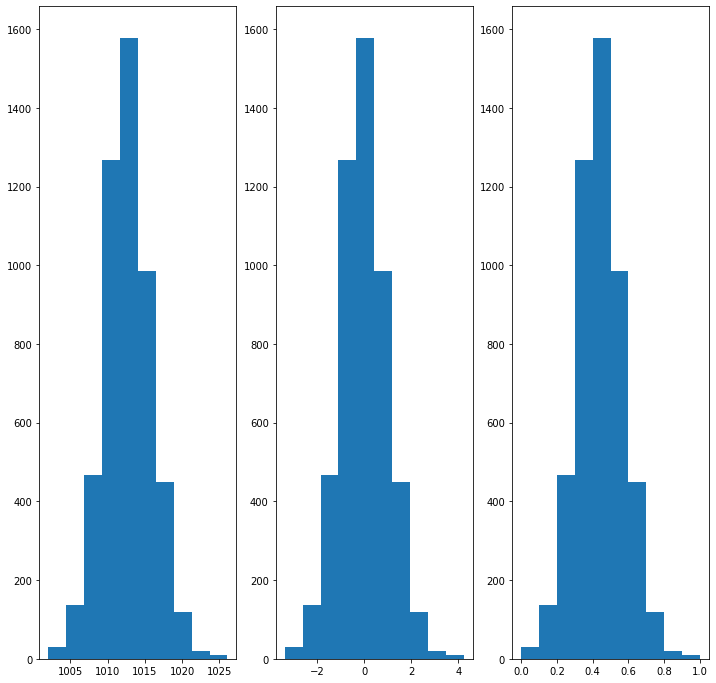

In [ ]:
plt.subplot(1,3,1)
plt.hist(data_features['ความกด']);
plt.subplot(1,3,2)
plt.hist(data_features_s[:,0]);
plt.subplot(1,3,3)
plt.hist(data_features_norm[:,0]);

# Discritization

In [ ]:
home_data = pd.read_csv('/content/gdrive/MyDrive/BPDM/1_กรณิศ เมืองเก่า.csv')

In [ ]:
home_data.shape

(100, 22)

In [ ]:
home_data.head()

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4


In [ ]:
home_data = home_data.dropna(subset=['sell_price'])

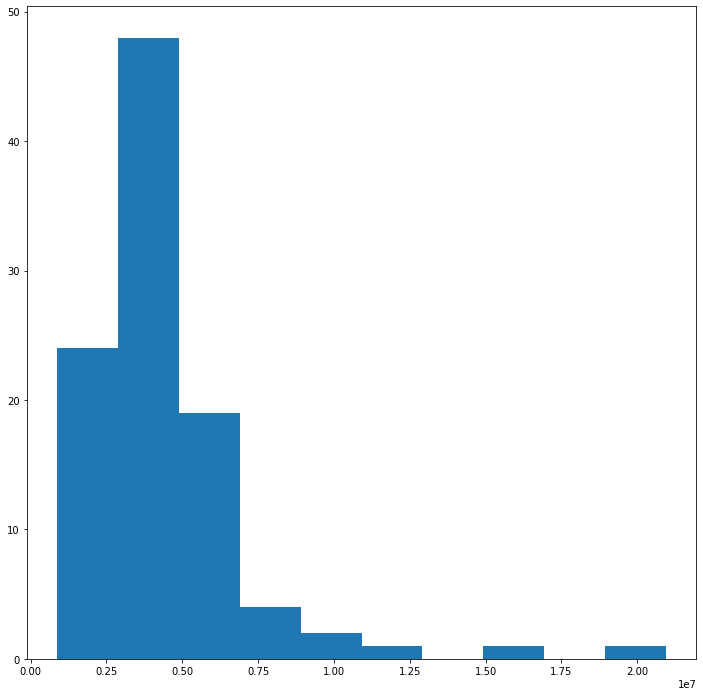

In [ ]:
plt.hist(home_data['sell_price']);

### แปลงค่า sell_price
- ราคาต่ำกว่า 500k ให้เป็น 1
- ราคาต่ำกว่า 500k-1m ให้เป็น 2
- ราคาต่ำกว่า 1m ขึ้นไป ให้เป็น 3

In [ ]:
#price_under = home_data[home_data]

In [ ]:
#deta1[(deta1['price_min']>=3000000) & (deta1['price_min']<=5000000)]

In [ ]:
#home_data[home_data['sell_price'] < 5000000 = 1
#home_data[home_data['sell_price'] < 5000000 & home_data[home_data['sell_price'] >10000000 = 2

In [ ]:
def filter(x):
    if x < 5000000:
      return "1"
    if x > 10000000:
      return "3"

In [ ]:
home_data['new_class'] = home_data['sell_price'].apply(filter)

In [ ]:
home_data

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,zone,street,sell_price,d250-7/11,d500-7/11,d750-7/11,d1000-7/11,d1250-7/11,d1500-7/11,new_class
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2,1
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5,1
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3,None
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12,1
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14,None
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9,None
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9,1
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,1,3,3,4,1
